# A* Algo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math

n = 5
matrix = []
block_unblock_matrix = []


In [2]:
def euclidean_distance_calc(i, j, n):
    return math.sqrt(((n - i)**2 + (n - j)**2))

def chebyshev_distance_calc(i, j, n):
    return max((n - i), (n - j))


def manhattan_distance_calc(i, j, n):
    return abs(n - i) + abs(n - j)

def compute_hofn(n, heuristic):
    
    hofn_matrix = []
    for i in range(n):
        hofn_row = []
        for j in range(n):
            if heuristic == "euclidean":
                dist = euclidean_distance_calc(i, j, n -1)
            elif heuristic == "chebyshev":
                dist = chebyshev_distance_calc(i, j, n -1)
            elif heuristic == "manhattan":
                dist = manhattan_distance_calc(i, j, n -1)
            hofn_row.append(dist)
        hofn_matrix.append(hofn_row)
    return np.array(hofn_matrix)

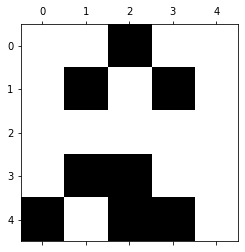

In [3]:
def populateMatrix(n,p):
    np_array = np.random.rand(n*n)
    block = lambda x: 0 if x>=p else 1
    vectorized_block = np.vectorize(block)
    np_array = vectorized_block(np_array).reshape(n,n)
    np_array[0,0]=0
    np_array[n-1,n-1] =0
    return np_array

np_array = populateMatrix(n,0.5)
block_unblock_matrix = np.asmatrix(np_array)

block_unblock_matrix = [[0, 0, 1, 0, 0],
        [0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0],
        [1, 0, 1, 1, 0]]
block_unblock_matrix = np.matrix(block_unblock_matrix)
plt.spy(block_unblock_matrix)


In [4]:
block_unblock_matrix

matrix([[0, 0, 1, 0, 0],
        [0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0],
        [1, 0, 1, 1, 0]])

g(n) matrix

In [5]:
def compute_gofn(n):
    k = 0
    gofn = []
    one_row = []
    for j in range(n):
        one_row.append(k)
        k += 1
    gofn.append(one_row)
    for i in range(n-1):
        one_row = [x+1 for x in one_row]
        gofn.append(one_row)

    gofn_matrix = np.array([np.array(xi) for xi in gofn])
    return gofn_matrix

In [6]:
def get_gofn(gofn_matrix, row, col):
    return gofn_matrix[row][col]

In [7]:
def get_hofn(hofn_matrix, row, col):
    return hofn_matrix[row][col]

In [8]:
def get_children(matrix, x, y, n, gofn, visited_list):
    allChildren = [(x+1,y,gofn+1),#down
                   (x-1,y,gofn+1),#up
                   (x,y+1,gofn+1),#right
                   (x,y-1,gofn+1)]#left
    if x+1 > n-1:
        allChildren.remove((x+1,y,gofn+1))
    if x-1 < 0:
        allChildren.remove((x-1,y,gofn+1))
    if y+1 > n-1:
        allChildren.remove((x,y+1,gofn+1))
    if y-1 < 0:
        allChildren.remove((x,y-1,gofn+1))
    print("allChildren", allChildren)
    for node in allChildren:
        if node[:2] in visited_list:
            allChildren.remove(node)
            print("removed: ", node, "from children")

    
    return allChildren

In [9]:
def sort(open_list, gofn_matrix, hofn_matrix):
    sort_dict = {}
    for node in open_list:
        row = node[0]
        col = node[1]
        gofn = gofn_matrix.item(row,col)
        hofn = hofn_matrix.item(row,col)
        fofn = gofn + hofn
        print("node", node, " - gofn: ", gofn,  " - hofn: ", hofn)
        sort_dict[node] = hofn
        
        sort_dict = dict(sorted(sort_dict.items(), key=lambda item: item[1]))
    return sort_dict

In [10]:
visited_list = []
open_list = []
trajectory_path = []
path_block = 0

start = (0, 0, 0)
goal = (n-1, n-1)

open_list.append(start)
gofn_matrix = compute_gofn(n)
hofn_matrix = compute_hofn(n, "manhattan")

while open_list:
    current_node = open_list.pop(0)
    visited_list.append(current_node[:2])
    trajectory_path.append(current_node[:2])
    print("current_node:", current_node)
    if block_unblock_matrix.item(current_node[0], current_node[1]) == 0:
        if current_node[0] == n-1 and current_node[1] == n-1:
            print("Reached Goal!!!!!!!!!!!!!!!!!!!!!!!")
            break
        print("visited_list", visited_list)

        children = get_children(block_unblock_matrix, current_node[0], current_node[1], n, current_node[2], visited_list)
        print("children", children)
        
        for node in children:
            if node not in open_list:
                open_list.append(node)
        sort_dict = sort(open_list, gofn_matrix, hofn_matrix)
        print("sort_dict", sort_dict)
        open_list = list(sort_dict.keys())
        print("updated open list: ", open_list)
        print("trajectory_path: ", trajectory_path)
        print("---------------------\n")

        #remove the nodes whose children are deadlocks from the trajectory path
        for child in children:
            if block_unblock_matrix.item(child[:2]) == 1:
                path_block += 1
            if path_block == len(children) and current_node[:2] in trajectory_path:
                trajectory_path.remove(current_node[:2])
    else:
        if open_list == []:
            print("There is no path available to goal Node")
            break
        else:
            print("path blocked from", current_node, "backtracking and attempting to Traversing from a different node")
            if current_node[:2] in trajectory_path:
                trajectory_path.remove(current_node[:2])

current_node: (0, 0, 0)
visited_list [(0, 0)]
allChildren [(1, 0, 1), (0, 1, 1)]
children [(1, 0, 1), (0, 1, 1)]
node (1, 0, 1)  - gofn:  1  - hofn:  7
node (0, 1, 1)  - gofn:  1  - hofn:  7
sort_dict {(1, 0, 1): 7, (0, 1, 1): 7}
updated open list:  [(1, 0, 1), (0, 1, 1)]
trajectory_path:  [(0, 0)]
---------------------

current_node: (1, 0, 1)
visited_list [(0, 0), (1, 0)]
allChildren [(2, 0, 2), (0, 0, 2), (1, 1, 2)]
removed:  (0, 0, 2) from children
children [(2, 0, 2), (1, 1, 2)]
node (0, 1, 1)  - gofn:  1  - hofn:  7
node (2, 0, 2)  - gofn:  2  - hofn:  6
node (1, 1, 2)  - gofn:  2  - hofn:  6
sort_dict {(2, 0, 2): 6, (1, 1, 2): 6, (0, 1, 1): 7}
updated open list:  [(2, 0, 2), (1, 1, 2), (0, 1, 1)]
trajectory_path:  [(0, 0), (1, 0)]
---------------------

current_node: (2, 0, 2)
visited_list [(0, 0), (1, 0), (2, 0)]
allChildren [(3, 0, 3), (1, 0, 3), (2, 1, 3)]
removed:  (1, 0, 3) from children
children [(3, 0, 3), (2, 1, 3)]
node (1, 1, 2)  - gofn:  2  - hofn:  6
node (0, 1, 1)  

In [11]:
np_array = populateMatrix(n,0)
final_display_matrix = np.asmatrix(np_array)

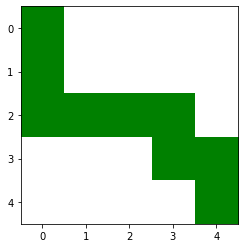

In [12]:
np_array
for path in trajectory_path:
    final_display_matrix[path[:2]] = 1

colormap = colors.ListedColormap(["white","green"])
plt.imshow(final_display_matrix, cmap=colormap)
plt.show()

In [13]:
np.matrix(block_unblock_matrix)

matrix([[0, 0, 1, 0, 0],
        [0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0],
        [1, 0, 1, 1, 0]])